# Manipulating data with Python and Numpy: The Digits Dataset

Author: [Alexandre Gramfort](http://alexandre.gramfort.net/) (Telecom ParisTech)
with some modifications by Chloé-Agathe Azencott `chloe-agathe.azencott@mines-paristech.fr`.

The goal of this notebook is to start manipulating data with Python and Numpy. We will use scikit-learn only to load the data.

The data you'll be working with today is called the `digit` datasets. It contains digital images of handwritten digits.

In [22]:
%pylab inline

# Equivalent to:
# import numpy as np                      
# import matplotlib.pyplot as plt 

Populating the interactive namespace from numpy and matplotlib


## 1. Loading the data
The data is available from scikit-learn (import name `sklearn`).

In [6]:
# Load data
from sklearn.datasets import load_digits 

digits = load_digits()

# Get descriptors and target to predict
X, y = digits.data, digits.target

# Get the shape of the data
print("Number of samples: %d" % X.shape[0])
print ("Number of pixels: %d" % X.shape[1])
print ("Number of classes: %d" % len(np.unique(y))) # number of unique values in y

Number of samples: 1797
Number of pixels: 64
Number of classes: 10


In [7]:
# Pick one sample to "visualize" it
sample_idx = 42

print (X[sample_idx, :])

print (y[sample_idx])

[ 0.  0.  0.  0. 12.  5.  0.  0.  0.  0.  0.  2. 16. 12.  0.  0.  0.  0.
  1. 12. 16. 11.  0.  0.  0.  2. 12. 16. 16. 10.  0.  0.  0.  6. 11.  5.
 15.  6.  0.  0.  0.  0.  0.  1. 16.  9.  0.  0.  0.  0.  0.  2. 16. 11.
  0.  0.  0.  0.  0.  3. 16.  8.  0.  0.]
1


### Problem 3.1
* What is the type of X? Of its entries?
* What is the type of y? Of its entries?
* Play with different values for `sample_idx`. Can you guess `y[sample_idx`]?

In [32]:
print("Type of X: %s" % type(X))
print("Type of X's entries: %s" % type(X[0][0]))
print("Type of y: %s" % type(y))
print("Type of y's entries: %s" % type(y[0]))
print(y[sample_idx])

Type of X: <class 'numpy.ndarray'>
Type of X's entries: <class 'numpy.float64'>
Type of y: <class 'numpy.ndarray'>
Type of y's entries: <class 'numpy.int64'>
1


## 2. Visualizing samples

Each sample is a scanned image, of size 8x8, containing 64 pixels. They have been flattened out to a vector of size 64, such as `X[sample_idx, :]`. Each entry of that vector is the intensity of the corresponding pixel.

Let us now visualize the original image.

In [33]:
# Reshape the vector X[sample_idx] in a 2D, 8x8 matrix
sample_image = np.reshape(X[sample_idx, :], (8, 8))
print(sample_image.shape)

(8, 8)


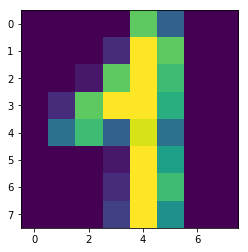

In [34]:
# Display the corresponding image
plt.imshow(sample_image)

Text(0.5, 1.0, 'The digit of index 42 is a 1')

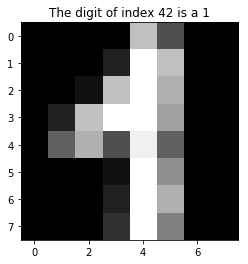

In [35]:
# Let us improve visualization by using grayscale plotting 
plt.imshow(sample_image, cmap='gray')

# Give the plot of title
plt.title('The digit of index %d is a %d' % (sample_idx, y[sample_idx]))

### Problem 3.2
Plot the histogram of the values of the pixels of the above image.

(array([38.,  4.,  0.,  4.,  0.,  2.,  4.,  4.,  0.,  8.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

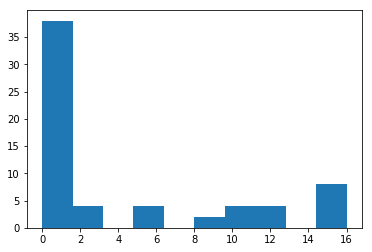

In [40]:
hist(X[sample_idx])

## 3. Statistics
In order to better understand the data, we will compute some basic statistics: the mean and variance, per class, for each digit, and visualize them as images.

In [41]:
# Get all possible classes
classes_list = np.unique(y).astype(int)
print ("Classes in our data: ", classes_list)

Classes in our data:  [0 1 2 3 4 5 6 7 8 9]


### Problem 3.3
Complete the code below to compute the mean image for every digit in the data set.

The mean image of all images representing a 0 is an image where the pixel of coordinates (i, j) takes the average value of all (i, j) pixels among images of 0.

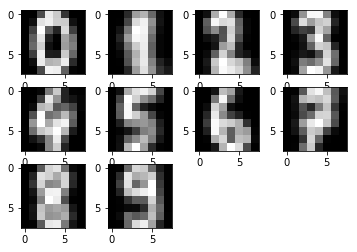

In [44]:
# For plotting
fig = plt.figure()

for idx in classes_list:
    ax = fig.add_subplot(3, 4, idx+1) # plot number (idx+1) on a 3x4 grid
    # Get indices of images of class idx
    images_indices = np.where(y==idx)
    
    # Get the corresponding pixel descriptions
    images = X[images_indices, :]
    
    # Compute the mean of these values
    mean_image_pixels = np.mean(images[0], axis=0)
    
    # Transform into an 8x8 image
    mean_image = np.reshape(mean_image_pixels, (8, 8))
    
    ax.imshow(mean_image, cmap='gray')

## (Facultative) Classification by nearest centroid.

The goal of this part is to make you implement your own classifier, based on a simple concept. For a new digit, you will return the class of its nearest mean digit.

### Problem 3.4
* Split the data base in two parts: `X_train`, `y_train` and `X_test`, `y_test`.
* For each digit, compute on `X_train` its mean representation. Store those in `centroids_train`, which is a 10x64 array.
* For each image of the test set, compute its nearest centroid. This is the prediction for this image. Store whether this prediction is correct
* What is the overall percentage of correct predictions with this method?

In [55]:
X_train = X[:len(X)//2]
y_train = y[:len(y)//2]
X_test = X[len(X)//2:]
y_test = y[len(y)//2:]

classes_list = np.unique(y_train).astype(int)
centroids_train = []
for idx in classes_list:
    images_indices = np.where(y==idx)
    images = X[images_indices, :]
    mean_image_pixels = np.mean(images[0], axis=0)
    centroids_train.append(mean_image_pixels)

resultats = 0
erreurs = []
for i in range(len(X_test)):
    liste_ecart_quadratique = []
    for idx in classes_list:
        ecart_quadratique_au_carre = 0
        for j in range(len(X_test[i])):
            ecart_quadratique_au_carre += np.square(X_test[i][j] - centroids_train[idx][j])
        liste_ecart_quadratique.append(ecart_quadratique_au_carre)
    prediction = np.argmin(liste_ecart_quadratique)

    prediction_est_exacte = (prediction == y_test[i])
    if prediction_est_exacte:
        resultats+=1
    else:
        erreurs.append(i)

pourcentage = resultats/len(X_test)*100

print("Le taux de réussite est de : %d%%" % pourcentage)
print("Il y a eu des erreurs pour les images n° :", erreurs)

Le taux de réussite est de : 90%
Il y a eu des erreurs pour les images n° : [7, 8, 18, 22, 32, 39, 42, 49, 53, 54, 78, 89, 93, 102, 110, 112, 120, 197, 220, 251, 297, 299, 304, 312, 358, 366, 373, 390, 410, 439, 440, 443, 446, 463, 466, 525, 528, 542, 559, 563, 564, 570, 573, 587, 593, 597, 602, 610, 613, 616, 619, 624, 626, 631, 653, 654, 655, 671, 673, 675, 682, 684, 695, 697, 704, 705, 707, 708, 713, 720, 730, 735, 760, 762, 764, 767, 768, 782, 792, 814, 828, 829, 832, 849, 867, 892]
